<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [7]:
# Загрузка файла в переменную
data = pd.read_csv('../Продв Python/dst-3.0_16_1_hh_database.csv', sep = ';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
# Вывод первых пяти строк датафрэйма
data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
# Вывод информации о переменных (для заданий 3 и 4)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [5]:
# Вывод статистической информации
data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


In [6]:
data['Опыт работы'].nunique()  # вывести число уникальных значений в столбце

44413

**Выводы-ответы на вопросы платформы SF:**
1. Размерность таблицы: 44744 и 12, строк и столбцов соответственно
2. Загруженные данные не повреждены
3. Столбцы имеют тип данных object
4. Пропущенные значения присутствуют в столбцах: "Опыт работы", "Последнее/нынешнее место работы", "Последняя/нынешняя должность"
5. Столбец "Опыт работы" содержит 44413 уникальных значений
6. Из искомых должностей самой распространенной является "системный администратор".

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [8]:
# Преобразование столбца "Образование" с помощью анонимной функции
data['Образование и ВУЗ'] = data['Образование и ВУЗ'].astype(str)
data['Образование'] = data['Образование и ВУЗ'].apply(lambda x: 'высшее' if 'Высшее образование' in x else 'неоконченное высшее' if 'Неоконченное высшее' in x else 'среднее' if 'Среднее образование' in x else 'среднее специальное')
data.drop('Образование и ВУЗ', axis = 1, inplace = True)
data['Образование'].value_counts()  # вывод количества каждой из категорий переменной образование

Образование
высшее                 33863
среднее специальное     5761
неоконченное высшее     4561
среднее                  559
Name: count, dtype: int64

**Выводы-ответы на вопросы платформы SF:**

Средний уровень образование (школьное образование) имеют 559 соискателей.

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [11]:
# Создание переменной пол
data['Пол'] = data['Пол, возраст'].apply(lambda x: 'М' if 'Мужчина' in x else 'Ж')
round(len(data[data['Пол'] == 'Ж']) / len(data)*100, 2)  # вывод доли (%) соискателей женского пола

19

In [12]:
# Создание переменной возраст
data['Пол, возраст'] = data['Пол, возраст'].apply(lambda x: x.split(' '))
data['Возраст'] = data['Пол, возраст'].apply(lambda x: x[3])
data.drop('Пол, возраст', axis = 1, inplace = True)

In [13]:
data['Возраст'] = data['Возраст'].astype(int)
data['Возраст'].mean()  # расчет среднего возраста

32.19674146254246

**Выводы-ответы на вопросы платформы SF:**

1. Процетная доля женщин-соискателей составляет примерно 19%
2. Средний возраст соискателей равен 32,2.

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [14]:
def modif1(x):  # функция конвертации строки в список
    if pd.isna(x) == False:
        return x.split('  ')

def modif2(x):  # функция отбора первого элемента списка
    if type(x) == list:
        return x[0]

def year_extract(x):  # функция для отбора лет стажа и пересчет в месяца
    if pd.isna(x) == False:
        if 'года' in x:
            x = x.split(' ')
            n = x.index('года')
            y_n = n-1
            year_f = x[y_n]
            month_f = int(year_f)*12
            return month_f
        elif 'год' in x:
            x = x.split(' ')
            n = x.index('год')
            y_n = n-1
            year_f = x[y_n]
            month_f = int(year_f) *12
            return month_f
        elif 'лет' in x:
            x = x.split(' ')
            n = x.index('лет')
            y_n = n-1
            year_f = x[y_n]
            month_f = int(year_f) *12
            return month_f
        else:
            return 0

def month_extract(x):  # функция отбора числа месяцев стажа
    if pd.isna(x) == False:
        if 'месяцев' in x:
            x = x.split(' ')
            n = x.index('месяцев')
            y_n = n-1
            year_f = x[y_n]
            month_f = int(year_f) 
            return month_f
        elif 'месяца' in x:
            x = x.split(' ')
            n = x.index('месяца')
            y_n = n-1
            year_f = x[y_n]
            month_f = int(year_f) 
            return month_f
        elif 'месяц' in x:
            x = x.split(' ')
            n = x.index('месяц')
            y_n = n-1
            year_f = x[y_n]
            month_f = int(year_f) 
            return month_f
        else:
            return 0         
# Создание новой переменной, выраженной как число месяцев стажа соискателя
data['Опыт работы (месяц)'] = data['Опыт работы'].apply(modif1)
data['Опыт работы (месяц)'] = data['Опыт работы (месяц)'].apply(modif2)
data['Год в месяцах'] = data['Опыт работы (месяц)'].apply(year_extract)
data['Месяца'] = data['Опыт работы (месяц)'].apply(month_extract)
cols = ['Год в месяцах', 'Месяца']
data['Общее число месяцев'] = data[cols].sum(axis=1)
data.drop('Опыт работы', axis = 1, inplace = True)
data.drop('Год в месяцах', axis = 1, inplace = True)
data.drop('Месяца', axis = 1, inplace = True)
data.drop('Опыт работы (месяц)', axis = 1, inplace = True)
data['Опыт работы (месяц)'] = data['Общее число месяцев']
data.drop('Общее число месяцев', axis = 1, inplace = True)
data['Опыт работы (месяц)'] = data['Опыт работы (месяц)'].apply(lambda x: float('nan') if x == 0 else x)


In [16]:
data['Опыт работы (месяц)'].median()  # расчет медианы стажа соискателей, выраженного в месяцах

100.0

**Выводы-ответы на вопросы платформы SF:**

Медианное значение возраста соискателей составляет 100.

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*

In [17]:
def town_extract(x): # функция для отбора информации о городе
    if pd.isna(x) == False:
        x = x.split(' ,')
        town = x[0]
        million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
        if town == 'Москва':
            return town
        elif town == 'Санкт-Петербург':
            return town
        elif town in million_cities:
            town_type = 'город-миллионик'
            return town_type
        else:
            town_type2 = 'другие'
            return town_type2

def ready_1(s):
    s = s.split(',')
    for x in s:
        if re.findall(r'ерее', x) == ['ерее']:
            if ('готов' in x or 'хочу' in x) and ('не готов' not in x):
                return True
            else:
                return False

def ready_2(s):
    if 'командировка' in s:
        if (re.findall(r'не готов к командировкам', s) == ['не готов к командировкам']) \
        or (re.findall(r'не готова к командировкам', s) == ['не готова к командировкам']):
            return False
        else:
            return True
    else:
        return False
             
data['Город'] = data['Город, переезд, командировки'].apply(town_extract)
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(ready_1)
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(ready_2)


In [22]:
data.drop('Город, переезд, командировки', axis = 1, inplace = True)

In [20]:
mask0 = data['Город'] == 'Санкт-Петербург'
len(data[mask0])/len(data)*100  # # доля (%) соискателей, живущих в Санкт-Петербурге

11.033881637761487

In [21]:
mask1 = data['Готовность к переезду'] == True
mask2 = data['Готовность к командировкам'] == True
r = data[mask1 & mask2]
len(r)/len(data)*100 # доля (%) соискателей, готовых и к переездам, и к командировкам

31.86572501340962

**Выводы-ответы на вопросы платформы SF:**

1. 11% соискателей живут в Санкт-Петербурге
2. 32% соискателей готовы и к переездам, и к командировкам.

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [23]:
def label_1(x):
   if pd.isna(x) == False:
       if 'олн' in x:
           return True
       else:
           return False

def label_2(x):
   if pd.isna(x) == False:
       if 'частич' in x:
           return True
       else:
           return False

def label_3(x):
   if pd.isna(x) == False:
       if 'проек' in x:
           return True
       else:
           return False       

def label_4(x):
   if pd.isna(x) == False:
       if 'стажир' in x:
           return True
       else:
           return False

def label_5(x):
   if pd.isna(x) == False:
       if 'волон' in x:
           return True
       else:
           return False       
def label_6(x):
   if pd.isna(x) == False:
       if 'полн' in x:
           return True
       else:
           return False

def label_7(x):
   if pd.isna(x) == False:
       if 'смен' in x:
           return True
       else:
           return False

def label_8(x):
   if pd.isna(x) == False:
       if 'гибк' in x:
           return True
       else:
           return False

def label_9(x):
   if pd.isna(x) == False:
       if 'удал' in x:
           return True
       else:
           return False
       
def label_10(x):
   if pd.isna(x) == False:
       if 'вахт' in x:
           return True
       else:
           return False

# Создание новых переменных путем преобразования столбцов с помощью авторских функций             
data['Полная занятость'] = data['Занятость'].apply(label_1)
data['Частичная занятость'] = data['Занятость'].apply(label_2)
data['Проектная работа'] = data['Занятость'].apply(label_3)
data['Стажировка'] = data['Занятость'].apply(label_4)
data['Волонтерство'] = data['Занятость'].apply(label_5)
data['Полный день'] = data['График'].apply(label_6)
data['Сменный график'] = data['График'].apply(label_7)
data['Гибкий график'] = data['График'].apply(label_8)
data['Удаленная работа'] = data['График'].apply(label_9)
data['Вахтовый метод'] = data['График'].apply(label_10)
data.drop('Занятость', axis = 1, inplace = True)
data.drop('График', axis = 1, inplace = True)



In [24]:
mask3 = data['Волонтерство'] == True
mask4 = data['Проектная работа'] == True
data[mask3 & mask4]  # число людей, которые ищут проектную работу и волонтерство

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Полная занятость,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Сменный график,Гибкий график,Удаленная работа,Вахтовый метод
176,50000 руб.,Frontend-разработчик,КАПО им. С.П.Горбунова,Инженер-конструктор,16.04.2019 07:22,Не указано,высшее,М,25,65.0,...,True,True,True,True,True,True,True,True,True,True
276,29000 руб.,IT - 1С специалист администратор систем,Фриланс,Инженер-конструктор,13.05.2019 13:10,Имеется собственный автомобиль,высшее,М,37,160.0,...,True,True,True,True,True,True,True,True,True,True
303,35000 руб.,Специалист службы технической поддержки (сеть ...,ИП сёмкин,Грузчик,05.04.2019 19:12,Имеется собственный автомобиль,среднее специальное,М,29,29.0,...,True,True,True,True,True,True,True,True,True,True
355,150000 руб.,Ведущий программист 1C,Kontakt home,Старший программист,13.04.2019 15:07,Имеется собственный автомобиль,высшее,М,30,79.0,...,True,False,True,False,True,False,False,False,True,False
425,5500 EUR,"Design Engineer, Research Engineer",Interpribor,"Design Engineer, Mechanical Design Engineer",17.04.2019 07:39,Имеется собственный автомобиль,высшее,М,34,72.0,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44296,110000 руб.,Менеджер по работе с клиентами,АВс Рус,Менеджер по продажам,07.05.2019 11:11,Не указано,высшее,М,31,131.0,...,True,True,True,True,True,True,True,True,True,True
44369,130000 руб.,Старший менеджер,Ruform,Менеджер по работе и зарубежными партнёрами,22.04.2019 13:17,Не указано,высшее,М,26,67.0,...,True,True,True,False,True,True,True,True,True,True
44414,25000 руб.,Инженер-электронщик Работы на дому у себя.,Ч.П.,Инженер-конструктор-электронщик,08.04.2019 12:29,Не указано,высшее,М,65,545.0,...,False,True,True,True,True,False,False,True,True,False
44517,60000 руб.,web dev,gridpix,Веб-разработчик,07.05.2019 05:13,Не указано,неоконченное высшее,М,22,27.0,...,True,True,True,True,True,True,True,True,True,False


In [25]:
mask4 = data['Вахтовый метод'] == True
mask5 = data['Гибкий график'] == True
data[mask4 & mask5]  # число людей, которые работать важтовым трудом и с гибким графиком

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Полная занятость,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Сменный график,Гибкий график,Удаленная работа,Вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,True,True,False,False,True,True,True,True,True
35,40000 руб.,Технический специалист,АО международный аэропорт Пермь,Оператор по наземному обслуживанию,19.04.2019 18:33,Не указано,среднее специальное,М,25,61.0,...,True,False,False,False,False,True,True,True,True,True
89,180000 руб.,Главный инженер проекта,"ООО ""Локальные сети""",Главный инженер,16.04.2019 23:32,Не указано,высшее,М,29,125.0,...,True,True,True,False,False,True,True,True,True,True
97,50000 руб.,Технический специалист,БАНК УРАЛСИБ,Специалист отдела Финансовыйнсового мониторинга,19.04.2019 09:12,Не указано,высшее,Ж,29,101.0,...,True,True,True,False,False,True,True,True,True,True
106,130000 руб.,IT Operations Coordinator,Тоталь Разведка Разработка Россия (TOTAL E&P R...,IT Operations Coordinator,22.04.2019 10:11,Имеется собственный автомобиль,неоконченное высшее,М,32,143.0,...,True,True,True,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44664,250000 KZT,Главный инженер,"Национальные информационные технологии, АО",Главный инженер управления телекоммуникаций,26.04.2019 12:51,Имеется собственный автомобиль,высшее,М,26,46.0,...,True,True,True,False,False,True,True,True,True,True
44666,35000 руб.,Администратор баз данных,Министерство финансов Астраханской области,Специалист по защите информации,26.04.2019 07:40,Не указано,высшее,М,28,70.0,...,True,True,True,False,False,True,True,True,True,True
44696,85000 руб.,Системный_администратор,Следственный комитет Российской Федерации,Инспектор отдела обеспечения и технической под...,22.04.2019 10:04,Имеется собственный автомобиль,высшее,М,30,112.0,...,True,False,False,False,False,True,True,True,True,True
44709,40000 руб.,Начальник отдела,qWell,"Менеджер по реализации проектов, менеджер call...",22.04.2019 14:08,Не указано,высшее,М,26,34.0,...,True,True,True,True,True,True,True,True,True,True


**Выводы-ответы на вопросы платформы SF:**

1. 436 людей ищут проектную работу и волонтерство
2. 2311 людей хотят работать вахтовым методом и с гибким графиком.

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [26]:
def salary_num(arg):
     salary = float(arg.split(' ')[0])
     return salary

def salary_curr(arg):
     dict = {
         'USD': 'USD', 'KZT': 'KZT',
         'грн': 'UAH', 'белруб': 'BYN',
         'EUR': 'EUR', 'KGS': 'KGS',
         'сум': 'UZS', 'AZN': 'AZN'
     }
     curr = arg.split(' ')[1].replace('.', '')
     if curr == 'руб':
        return 'RUB'
     else:
        return dict[curr]
    
erates = pd.read_csv('../Продв Python/ExchangeRates.csv')
erates['date'] = pd.to_datetime(erates['date'], dayfirst=True).dt.date
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date
data['ЗП (tmp)'] = data['ЗП'].apply(salary_num)
data['Курс (tmp)'] = data['ЗП'].apply(salary_curr)
merged = data.merge(
     erates, 
     left_on=['Курс (tmp)', 'Обновление резюме'],
     right_on=['currency', 'date',], 
     how='left'
 )
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
data['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']
data = data.drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1)
print(round(data['ЗП (руб)'].median()/1000)) 

C:\Users\Эдгар\AppData\Local\Temp\ipykernel_2664\3350973098.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  erates['date'] = pd.to_datetime(erates['date'], dayfirst=True).dt.date


59


**Выводы-ответы на вопросы платформы SF:**

Медианная заработная плата составляет 59 тыс. рублей среди соискатлей. 

In [27]:
data.info()  # вывести структуру данных после преобразования датафрэйма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int32  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  Полная занятость  

**Выводы:**

Результаты обработки датасета соответсвуют таковым на платформе SF, что подтверждает корректность выполненных действий.

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [28]:
# Построение гистограммы для переменной "возраст" соискателей
px.histogram(data, x = 'Возраст', title = 'Распределение возраста среди соискателей работы')

c:\Users\Эдгар\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



[Text(0.5, 1.0, 'Распределение возраста среди соискателей работы')]

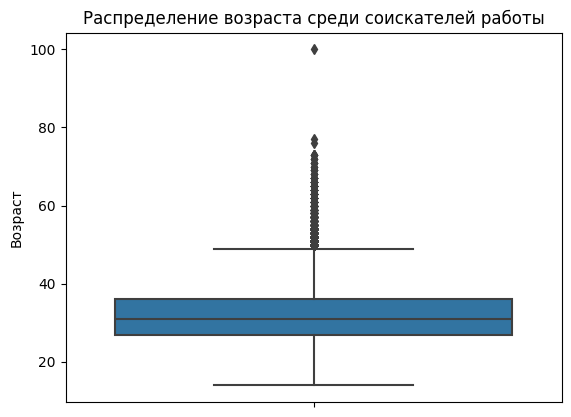

In [30]:
sns.boxplot(y='Возраст', data=data).set(title = 'Распределение возраста среди соискателей работы')

**Выводы:**
1. Модальное распределение возраста составляет 30
2. Интервал преобладающего возраста: 24-35
3. Предельные значения: 17 и 57
4. Есть выбросы в области более 57 лет. Видимо, были ошибки при вводе данных, ибо встречается возраст в районе 80 и 100, что можно принять за аномалии
5. В принципе, распределение соответствует нормальному.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [33]:
data['Опыт работы (месяц)'].max()  # определим максимальный стаж работы

1188.0

In [36]:
# Построение гистограммы для переменной "опыт работы (месяц)" соискателей
px.histogram(data, x = 'Опыт работы (месяц)', title = 'Опыт работы (месяц)')

c:\Users\Эдгар\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



[Text(0.5, 1.0, 'Опыт работы (месяц)')]

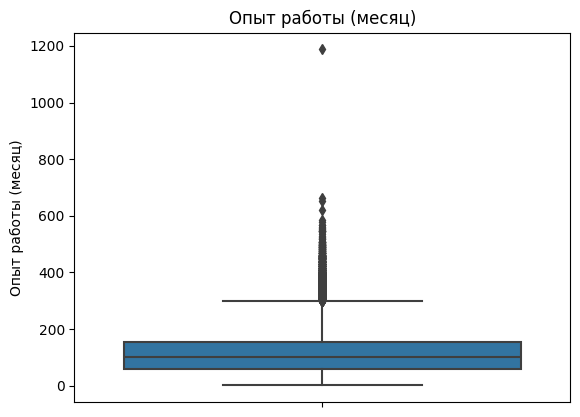

In [35]:
sns.boxplot(y='Опыт работы (месяц)', data=data).set(title = 'Опыт работы (месяц)')

**Выводы:**
1. Модальный интервал стажа: 80-84
2. Предельные интервалы опыта работы: 0-4 и 495-499
3. Аномалией можно принять налчие выбросов и больших значений (1188 месяцев стажа = 99 лет)
4. Наиболее широкие интервалы опыта работы: 20-24 и 140-144.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [38]:
# Построение гистограммы для переменной "ЗП (руб)" соискателей
px.histogram(data, x = 'ЗП (руб)', title = 'Распределение желаемой заработной платы среди соискателей')

In [41]:
m200 = data['ЗП (руб)'] > 1000000  # отбор соискателей с желаемой зарплатой более миллиона рублей
k= data[m200]
k

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Сменный график,Гибкий график,Удаленная работа,Вахтовый метод,ЗП (руб)
6931,"Программирование, Разработка или Системный адм...","Евразийский банк, АО",Главный специалист Отдел разработки систем роз...,2019-04-22,Не указано,высшее,М,31,115.0,другие,...,True,True,False,False,True,True,True,True,False,24304876.0
28253,"Руководитель IT проектов, Роботизация, Автомат...",HAMSTER ROBOTICS,Заместитель директора,2019-04-27,Имеется собственный автомобиль,высшее,М,39,280.0,Москва,...,True,True,False,False,True,False,True,True,True,3000000.0
39191,Специалист по IT,"ТОО ""AMS""",Системный администратор,2019-04-22,Не указано,среднее специальное,М,29,98.0,другие,...,False,False,False,False,True,False,False,False,False,7675224.0
41924,Project manager,Тинькофф Банк,Технолог автоматизации бизнес-процессов,2019-04-22,Не указано,неоконченное высшее,М,24,39.0,Москва,...,True,True,False,False,True,False,True,True,False,1750000.0
43134,Chief AI Officer,Finnish Russian Univeristy Cooperation in Tele...,Project Manager in Multimedia Technologies,2018-10-25,Не указано,высшее,М,38,97.0,Москва,...,False,False,False,False,True,False,False,False,False,2500000.0


**Выводы:**
1. Предельные значения зарплаты: 24304876.0 и 1.0 (эти значения можно принять аномалиями и мало реалистичными)
2. Наиболее распространенной интервал заработной платы: 27.5-52.49.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

c:\Users\Эдгар\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Эдгар\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Эдгар\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



[Text(0.5, 1.0, 'Зависимость медианной желаемой заработной платы от уровня образования')]

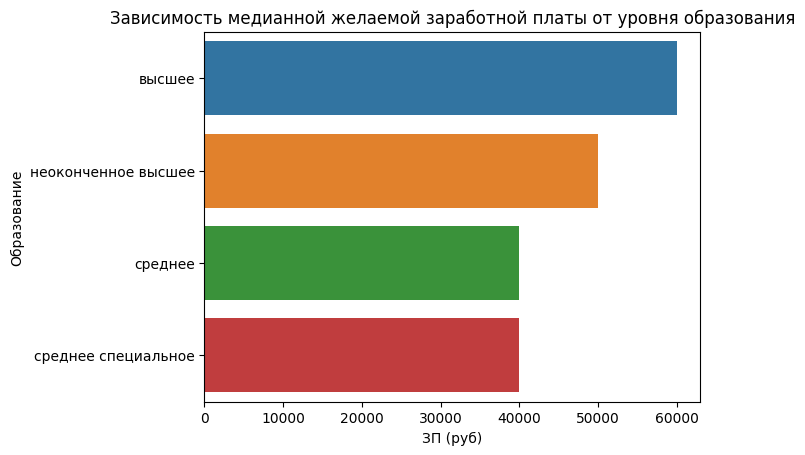

In [45]:
# Построение диаграммы взаимосвязи категории образования и желаемой заработной платы
task_4 = data[data['ЗП (руб)'] < 1000000]
task_4_f = data.groupby(by = 'Образование', as_index=False)['ЗП (руб)'].median()
sns.barplot(y = 'Образование', x = 'ЗП (руб)', data = task_4_f).set(title = 'Зависимость медианной желаемой заработной платы от уровня образования')

**Выводы:**
1. Наибольший размер зарплаты запршивают соискатели с высшим образованием, наименьший - со средним специальным образованием и средним
2. Уровень образования важен при прогнозировании размера зарплаты, так как люди с высшим образованием могут занимать высокоплачиваемые должности в отличие от остальных категорий по образованию.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [46]:
task_5 = data[data['ЗП (руб)'] < 1000000]
task_5_f = task_5.groupby(by = 'Город', as_index=False)['ЗП (руб)'].median()
task_5_f

,Город,ЗП (руб)
0,Москва,85000.0
1,Санкт-Петербург,60000.0
2,город-миллионик,40000.0
3,другие,40000.0


<Axes: title={'center': 'ЗП (руб)'}, xlabel='Город'>

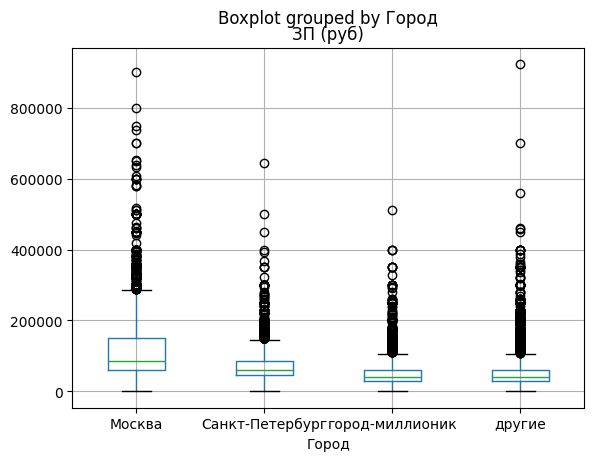

In [182]:
task_5.boxplot(column= ['ЗП (руб)'], by = 'Город')

**Выводы:**
1. Наибольший размах в уровне зарплаты характерен для Москвы и группы городов "другие". Анализ зависимости затруднен из-за налчия большого числа выбросов
2. В целом можно заметить, что уровень зарплаты в крупных городах превышает таковой в других регионах. Поэтому переменную "город" можно учитывать при построении прогностической модели.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [47]:
# ваш код здесь
task_6_f = task_5.groupby(['Готовность к переезду','Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
task_6_f

,Готовность к переезду,Готовность к командировкам,ЗП (руб)
0,False,False,40000.0
1,False,True,60000.0
2,True,False,50000.0
3,True,True,65535.0


In [49]:
px.bar(task_6_f,x='Готовность к командировкам',y='ЗП (руб)',height=500,width=1000,color="Готовность к переезду", title = 'Зависимость медианной зарплаты от готовности к переезду и командировкам')

**Выводы:**
1. Наибольший уровень зарплаты (65,5 тыс.) запрашивают соискатели, готовые и к переезду, и к командировкам
2. Наименьший уровень зарплаты (40 тыс.) запрашивают соискатели, не готовые и к переезду, и к командировкам
3. В остальных группах уровень заплаты варьирует в пределах 50-60 тыс.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [51]:
task_7_f = task_5.pivot_table(values='ЗП (руб)', index='Образование', columns='Возраст', aggfunc='median', fill_value=0)

px.imshow(task_7_f,color_continuous_scale='YlOrRd',height=500,width=1400, title = 'Зависимость медианной желаемой заработной платы от возраста и образования')  # построение тепловой карты

**Выводы:**

Наиболее быстрый карьерный рост наблюдается у категории соискателей с высшим образованием, наиболее медленный - у людей со средним и средним специальным образованием. Категория людей с неоконченным высшим образованием является промежуточной в этой закономерности.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [55]:
# Построение диаграммы рассеяния
scat = px.scatter(data,y=round(data['Опыт работы (месяц)'] / 12, 2),x='Возраст')

# Добавление линии по координатам (0, 0) и (100, 100)
scat.add_scatter(x=[0,100], y=[0,100], line_color="green",showlegend=False)


**Выводы:**

7 точек находятся выше построенной прямой, что является аномалией в данных.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [57]:
# ваш код здесь
print(data.duplicated().sum())  # вывести число дубликатов в датафрэйме
data_no_dupl = data.drop_duplicates(ignore_index=True)

161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [226]:
nan_num = data_no_dupl.isnull().sum()
colum = nan_num[nan_num > 0].sort_values(ascending=False)
colum  # количество пропущенных значений по переменным 

Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [228]:
# Отбор целевых переменных
data_new = data_no_dupl.dropna(how='any', subset=['Последняя/нынешняя должность', 'Последнее/нынешнее место работы'])
data_new = data_new.fillna(value={'Опыт работы (месяц)':data_new['Опыт работы (месяц)'].median()})

# Проверка на количество пропусков
col_nan = data_new.isnull().sum()

round(data_new['Опыт работы (месяц)'].mean())  # среднее значение стажа в месяцах после очистки 


114

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [233]:
# Удаление резюме по интервалу зарплаты
m4 = (data_new['ЗП (руб)'] > 1000000) | (data_new['ЗП (руб)'] < 1000)
positions = data_new[m4].index
hh_clear_anom = data_new.drop(index=positions)

positions.value_counts().sum()

89

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [236]:
mask5 = (hh_clear_anom['Опыт работы (месяц)'] / 12) > hh_clear_anom['Возраст']
pos = hh_clear_anom[mask5].index
hh_no_anom = hh_clear_anom.drop(index=pos)

pos.value_counts().sum()

7

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [241]:
# Построение гистограммы
vis = px.histogram(
    data_frame=hh_no_anom,
    x=np.log(hh_no_anom['Возраст']),   
    width=800,
    height=500,
    )
# Создание линии среднего значения для определения ассиметрии распределегия
vis.add_shape(
    type='line',
    line_color='red',
    line_width=3,
    opacity=1,
    line_dash='solid',
    x0=np.log(hh_no_anom['Возраст']).mean(),
    x1=np.log(hh_no_anom['Возраст']).mean(),
    xref='x',
    y0=0,
    y1=3000,
    yref='y'
    )

# Обозначение границы по методу z-отклонения для варианта +3, -3 и +4 сигмы 
vis.add_shape(
    type='line',
    line_color='red',
    line_width=3,
    opacity=1,
    line_dash='dot',
    x0=np.log(hh_no_anom['Возраст']).mean() + 3 * np.log(hh_no_anom['Возраст']).std(),
    x1=np.log(hh_no_anom['Возраст']).mean() + 3 * np.log(hh_no_anom['Возраст']).std(),
    xref='x',
    y0=0,
    y1=3000,
    yref='y'
    )

vis.add_shape(
    type='line',
    line_color='red',
    line_width=3,
    opacity=1,
    line_dash='dot',
    x0=np.log(hh_no_anom['Возраст']).mean() - 3 * np.log(hh_no_anom['Возраст']).std(),
    x1=np.log(hh_no_anom['Возраст']).mean() - 3 * np.log(hh_no_anom['Возраст']).std(),
    xref='x',
    y0=0,
    y1=3000,
    yref='y'
    )

vis.add_shape(
    type='line',
    line_color='green',
    line_width=3,
    opacity=1,
    line_dash='dot',
    x0=np.log(hh_no_anom['Возраст']).mean() + 4 * np.log(hh_no_anom['Возраст']).std(),
    x1=np.log(hh_no_anom['Возраст']).mean() + 4 * np.log(hh_no_anom['Возраст']).std(),
    xref='x',
    y0=0,
    y1=3000,
    yref='y'
    )

def z_mod(data, feature, log_scale=False, left=3, right=3, shift=0):  # создание функции для расчета числа выбросов
    if log_scale:
        x = np.log(data[feature]+shift)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


# Расчет числа выбросов методом z-отклонений для границ 3 сигмы         
outliers, cleaned = z_mod(hh_no_anom, 'Возраст', log_scale=True)       
print(f'Количество выбросов при границах от -3 до +3 сигм: {outliers.shape[0]}')

# # Расчет числа выбросов методом z-отклонений для границ +4/-3 сигмы  
outliers, cleaned = z_mod(hh_no_anom, 'Возраст', right=4, log_scale=True)        
print(f'Количество выбросов при границах от -3 до +4 сигм: {outliers.shape[0]}')

# Вывод таблицы с выбросами
clean_data = cleaned
display(outliers)

Число выбросов при границах от -3 до +3 сигм: 112
Число выбросов при границах от -3 до +4 сигм: 3


,Ищет работу на должность:,"Город, переезд, командировки",Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Сменный график,Гибкий график,Удаленная работа,Вахтовый метод,ЗП (руб)
30982,Менеджер по работе с клиентами,"Санкт-Петербург , не готов к переезду , не гот...","ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,...,True,False,False,False,False,True,True,True,False,10000.0
32795,Тестировщик игр,"Канск , не готов к переезду , не готов к коман...",OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,...,False,False,False,False,True,False,False,False,False,2000.0
33499,Frontend-разработчик,"Санкт-Петербург , не готов к переезду , готов ...",Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,...,True,True,True,False,True,False,True,True,False,60000.0


**Выводы:**
1. Число полных дубликатов равно 161
2. Количество пропусков в данных составляет 168
3. Результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков равно 114
4. Обнаружено 89 выбрсосов (по результату анализа заработной платы: менее 1000 и более миллиона)
5. 7 позиций в резюме , в которых опыт работы в годах превышал возраст соискателя
6. С помощью метода z-отклонений обнаружено 3 выброса (резюме людей, чей возраст слишком преклонный для поиска работы).

Обработка и очистка данных - важный этап перед проектированием модели машинного обучения, так как позволяет обнаружить выбросы и оставить только реальные значения.